## Reading and cleaning jsons

In [7]:
import json
import re 
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from bert_embedding import BertEmbedding
import RAKE
import operator
from nltk.stem import PorterStemmer

In [10]:
video_texts = []
# dict list
with open('./Channel3/transcript_channel3.json') as f:
    data = json.load(f)

for i in range(len(data)):
    transcript = list(data[i].values())
    if transcript[2] is not None: #Change index to 2 for channel 3, 0 for others
        string = transcript[2][63:]
        string = re.sub("([\<\[]).*?([\>\]])", "\g<1>\g<2>", string)
        string = re.sub("[\<\[].*?[\>\]]", "", string).rstrip('\n')
        arr = string.split('\n')
        clean_arr = []
        for sentence in arr:
            if sentence != '' and sentence != ' ' and 'align' not in sentence:
                clean_arr.append(sentence)
        
        clean_text = []
        for j in range(0,len(clean_arr),3):
            clean_text.append(clean_arr[j])
        
        video_text = ''
        for sen in string_arr:
            video_text += sen+' '
        video_texts.append(video)

In [11]:
len(video_texts)

854

## Preprocessing text (extracting keywords)

In [30]:
bert_embedding = BertEmbedding()
# result = bert_embedding(video_texts)

In [31]:
cleaned_texts = []
for v in video_texts:
    cleaned_texts.append(''.join([i for i in v if not i.isdigit()]))

In [15]:
stop_dir = "SmartStoplist.txt"
rake_object = RAKE.Rake(stop_dir)

In [24]:
#####

# STEMMING (OPTIONAL)

####

# from nltk.tokenize import sent_tokenize, word_tokenize

# ws = word_tokenize(cleaned_texts[4].lower())

# for w in ws:
#     print(ps.stem(w))
# # for cleaned_texts[4].lower()

In [17]:
video_embeds = []
list_of_kwords = []
for text in cleaned_texts:
    keywords = rake_object.run(text)
    list_of_kwords.append(keywords[:30])
    for k in keywords[:30]:
        key_embed = bert_embedding([k[0]])
        mean_avg = []
        for embed in key_embed:
            to_avg = []
            for e in embed[1]:
                to_avg.append(e)
        mean_avg.append(np.mean(to_avg, axis=0))
    video_embeds.append(np.mean(mean_avg,axis=0))
#     keys.append(k[0])

In [32]:
len(video_embeds)

854

## Hierarchical clustering and plots

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
preds = cluster.fit_predict(video_embeds)

In [20]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,

In [21]:
# Checking results of clustering
cluster = 2
indices = [i for i, x in enumerate(preds) if x == cluster]
print(len(indices))

167


In [26]:
# Keywords of video in specific cluster
list_of_kwords[2]

[('subnetting dns encryption technologies network', 25.0),
 ('protect computer networks software data', 24.0),
 ('integration problems plan research', 16.0),
 ('hundred thousand dollar range', 16.0),
 ('information system tools determine', 15.5),
 ('industry standard testing write', 15.0),
 ('project test security solutions', 14.666666666666666),
 ('implement security policies respond', 14.666666666666666),
 ('service grade student today', 14.5),
 ('phishing social engineering knack', 14.5),
 ('security specifically security specialists', 13.333333333333332),
 ('security specialist soft skills', 10.515151515151514),
 ('computer science field', 10.0),
 ('determine effective ways', 9.5),
 ('designing testing implementing', 9.0),
 ('past work experience', 9.0),
 ('certification recommendations gic', 9.0),
 ('++ python passion powershell', 9.0),
 ('design security architects', 8.666666666666666),
 ('security team define', 8.666666666666666),
 ('security position called', 7.666666666666666)

In [27]:
# Performing tsne to project video embeddings
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=42, n_iter=300)
tsne_results = tsne.fit_transform(video_embeds)

[t-SNE] Computing 127 nearest neighbors...
[t-SNE] Indexed 854 samples in 0.040s...
[t-SNE] Computed neighbors for 854 samples in 1.189s...
[t-SNE] Computed conditional probabilities for sample 854 / 854
[t-SNE] Mean sigma: 2.893326
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.222931
[t-SNE] KL divergence after 300 iterations: 1.449178


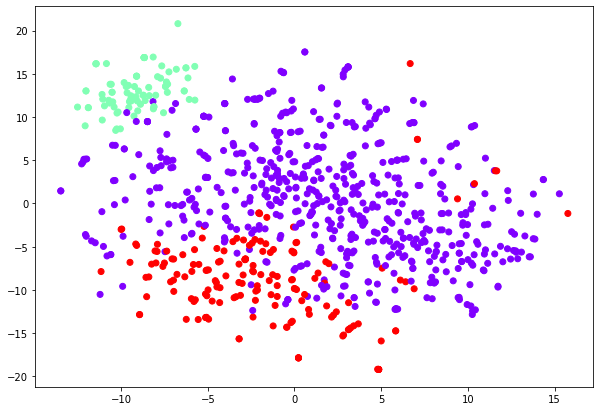

In [28]:
# Plotting T-SNE results
plt.figure(figsize=(10, 7))
scat = plt.scatter(tsne_results[:,0], tsne_results[:,1], c=cluster.labels_, cmap='rainbow')

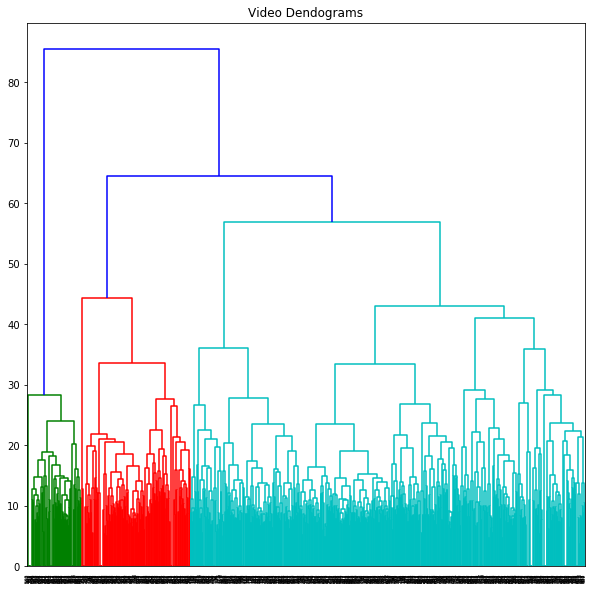

In [29]:
# Dendogram from the hierarchical clustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Video Dendograms")
dend = shc.dendrogram(shc.linkage(video_embeds, method='ward'))